<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/T_DenseNet121_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0

--2021-05-10 17:54:46--  https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda [following]
--2021-05-10 17:54:46--  https://www.dropbox.com/sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec248c7da0c7d9a1559e040d10.dl.dropboxusercontent.com/zip_download_get/AxpgoxT54eoEnUEihkUl1MbH7nIBn3zb0SYbjIyxQLhSbVefjv02cxMKWDOK0k_OxRt4Y-GFGKe362B1nFu_alHVx3239lZ2NdUfnSMTP_Ab9w [following]
--2021-05-10 17:54:51--  https://ucec248c7da0c7d9a1559e040d10.dl.dropboxusercontent.com/zip_download_get/AxpgoxT54eoEnUEihkUl1MbH7nIBn3zb0SYbjIyxQLhSbVefjv02cxMKWDOK0k_OxRt4Y-GFGKe362B1n

In [3]:
!unzip AADEmpop2CjJymIZ3QXkELpda?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: Train/Covid/COVID_train_422.jpg  
 extracting: Test/Normal/NORMAL_test_300.jpg  
 extracting: Train/Covid/COVID_train_133.jpg  
 extracting: Test/Normal/NORMAL_test_686.jpg  
 extracting: Train/Covid/COVID_train_284.jpg  
 extracting: Test/Normal/NORMAL_test_165.jpg  
 extracting: Test/Normal/NORMAL_test_519.jpg  
 extracting: Test/Normal/NORMAL_test_827.jpg  
 extracting: Train/Normal/NORMAL_train_5.jpg  
 extracting: Train/Covid/COVID_train_925.jpg  
 extracting: Test/Normal/NORMAL_test_295.jpg  
 extracting: Train/Covid/COVID_train_484.jpg  
 extracting: Test/Normal/NORMAL_test_702.jpg  
 extracting: Train/Covid/COVID_train_540.jpg  
 extracting: Test/Normal/NORMAL_test_781.jpg  
 extracting: Train/Covid/COVID_train_843.jpg  
 extracting: Train/Covid/COVID_train_583.jpg  
 extracting: Train/Covid/COVID_train_439.jpg  
 extracting: Test/Normal/NORMAL_test_420.jpg  
 extracting: Test/Normal/NORMAL_test_318.jpg  
 extracti

In [4]:
train_dir = "/content/Train"
test_dir = "/content/Test"
val_dir = "/content/Val"

In [5]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [6]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(256, 256))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(256, 256))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(256, 256))


Found 5581 images belonging to 2 classes.
Found 1822 images belonging to 2 classes.
Found 1635 images belonging to 2 classes.


In [17]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D,Flatten
from keras.models import Model
from keras import backend as K



In [18]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 427 layers


In [39]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

# model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [40]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_16 (ZeroPadding2 (None, None, None, 3 0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_16[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [41]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_9')>

In [42]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_16 (ZeroPadding2 (None, None, None, 3 0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_16[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [55]:
r = model.fit(
    train, 
    epochs=8,
    validation_data=validation,
    validation_steps=20,
)

Epoch 1/8
698/698 [==============================] - 96s 137ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0526 - val_accuracy: 0.9500
Epoch 2/8
698/698 [==============================] - 95s 137ms/step - loss: 0.0200 - accuracy: 0.9928 - val_loss: 0.1502 - val_accuracy: 0.9000
Epoch 3/8
698/698 [==============================] - 95s 136ms/step - loss: 0.0223 - accuracy: 0.9918 - val_loss: 0.6717 - val_accuracy: 0.9000
Epoch 4/8
698/698 [==============================] - 95s 137ms/step - loss: 0.0378 - accuracy: 0.9864 - val_loss: 1.9579e-04 - val_accuracy: 1.0000
Epoch 5/8
698/698 [==============================] - 95s 136ms/step - loss: 0.0208 - accuracy: 0.9928 - val_loss: 0.1220 - val_accuracy: 0.9500
Epoch 6/8
698/698 [==============================] - 96s 137ms/step - loss: 0.0099 - accuracy: 0.9962 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/8
698/698 [==============================] - 96s 138ms/step - loss: 0.0177 - accuracy: 0.9934 - val_loss: 0.1223 - val_accur

Text(0.5, 1.0, 'Accuracy Evolution')

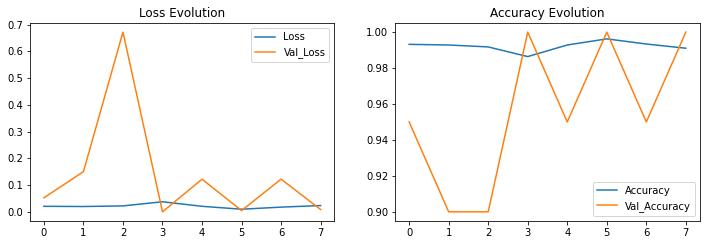

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


In [57]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1635/1635 [==============================] - 26s 16ms/step - loss: 0.0818 - accuracy: 0.9713
Test Accuracy: 97.13%
698/698 [==============================] - 45s 65ms/step - loss: 0.0200 - accuracy: 0.9927
Train Accuracy: 99.27%


In [58]:
predicted_vals = model.predict(test, steps=len(test))

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[700   5]
 [ 42 888]]


,0,1,accuracy,macro avg,weighted avg
precision,0.943396,0.994401,0.971254,0.968899,0.972408
recall,0.992908,0.954839,0.971254,0.973873,0.971254
f1-score,0.967519,0.974218,0.971254,0.970869,0.971330
support,705.000000,930.000000,0.971254,1635.000000,1635.000000
